In [1]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import networkx as nx

from cellmating.utils import file_traverse, load_from_pkl
from cellmating.io import imread

from script_wlli.mating_feature_extract import extract_mating_features, stack_features

from cellmating.plotlib._gray2color import multigray2rgb

from cellmating.cells import Cell, Cells
from cellmating.mating import Mating
from cellmating.cells import create_cells_from_image, Cells, create_cells_from_tracker

In [2]:
from script_wlli.for_check_result_utils import draw_subgraph
from script_wlli.for_check_result_utils import show_quantification
%load_ext autoreload
%autoreload 2

In [3]:
root = "/media/wd/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")
print("totle images: ", len(file_list))

totle images:  194


In [4]:
from tqdm import trange

 21%|███████████████████████▌                                                                                       | 20/94 [08:59<27:39, 22.42s/it]/home/wd/project/pipeline_data_process_mating_dynamic/script_wlli/for_check_result_utils.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(figsize=(5, 5))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [37:31<00:00, 23.95s/it]


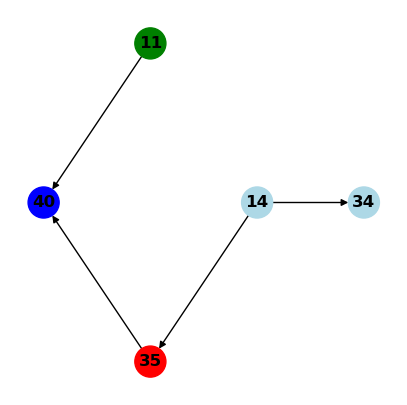

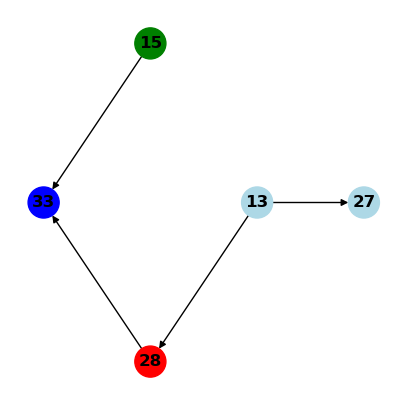

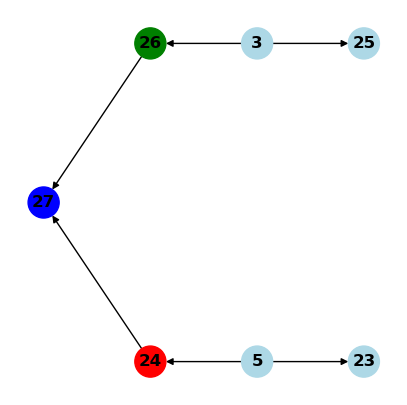

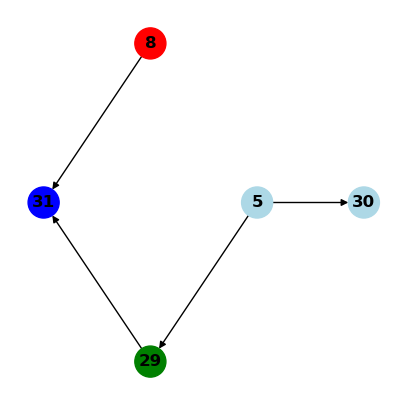

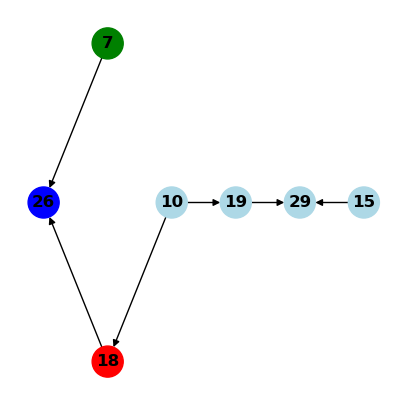

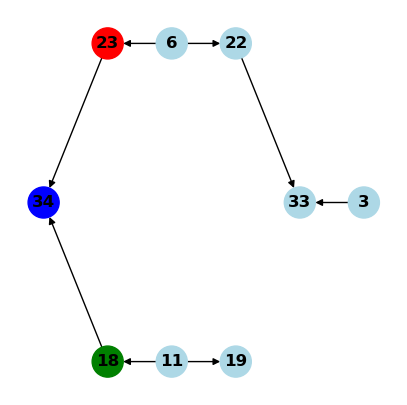

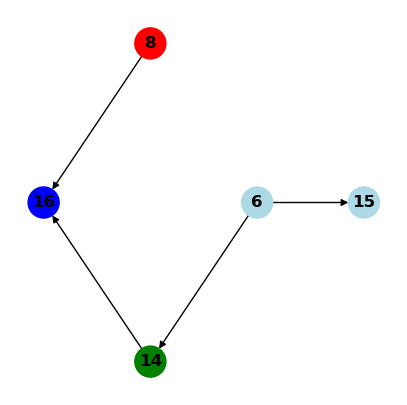

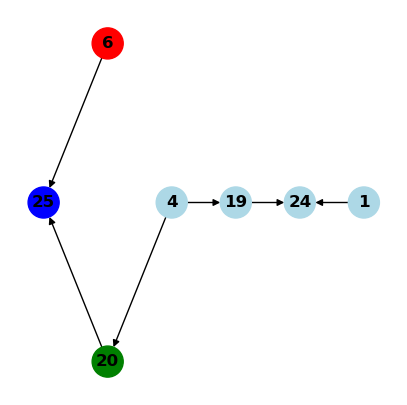

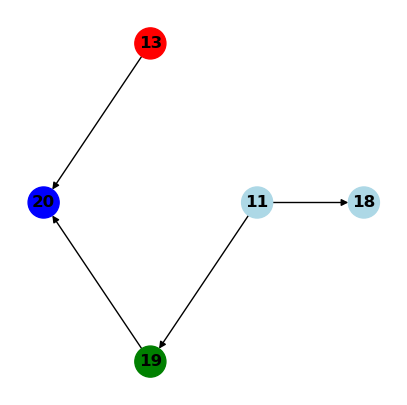

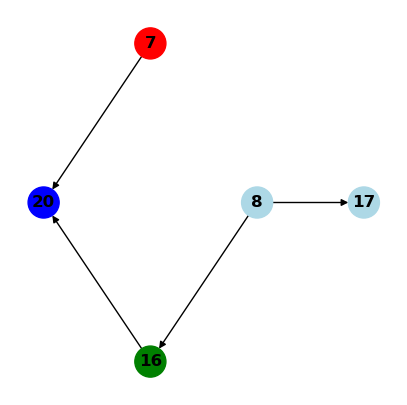

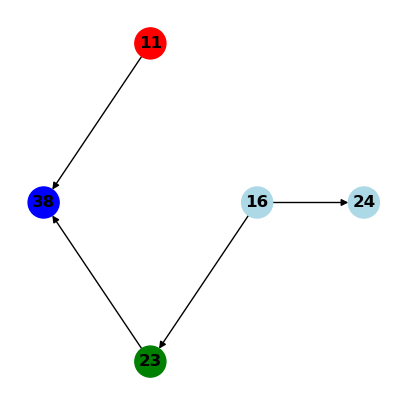

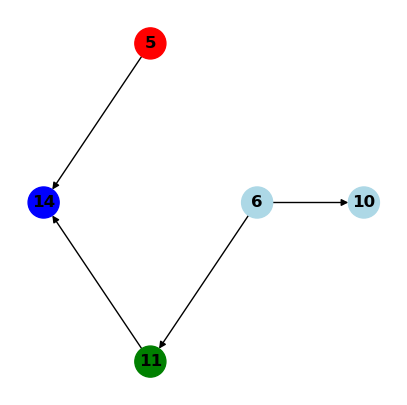

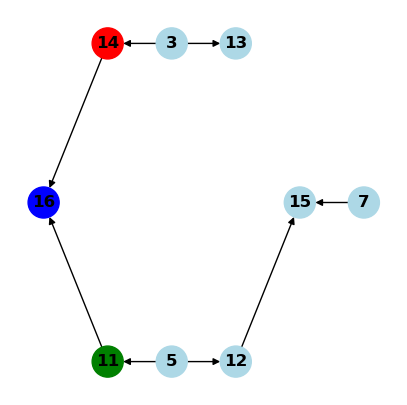

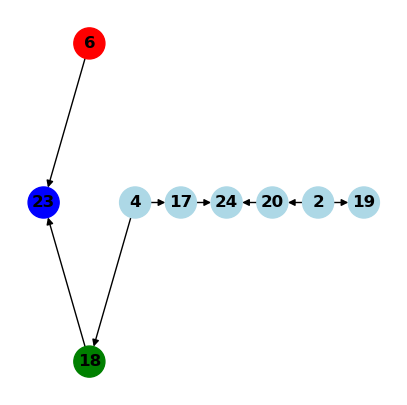

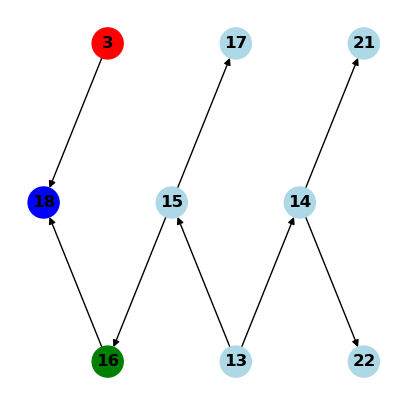

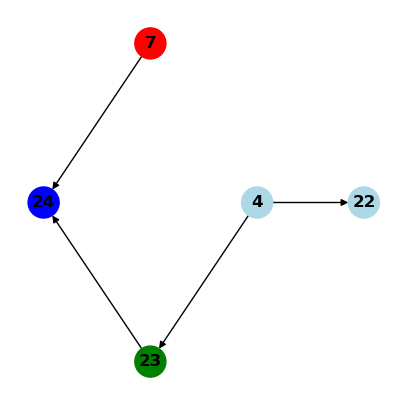

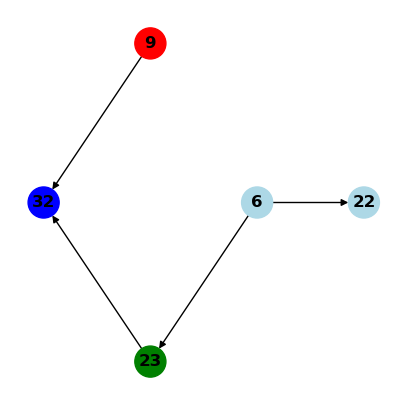

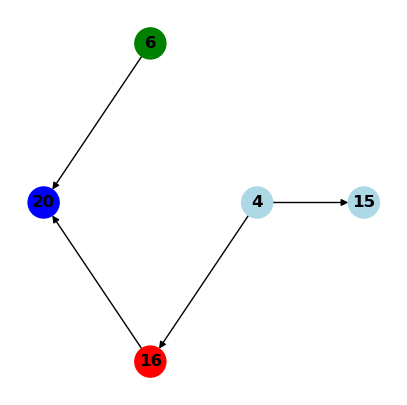

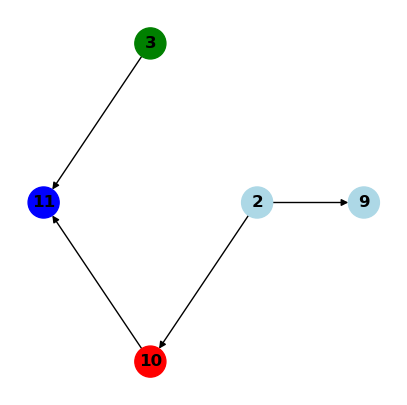

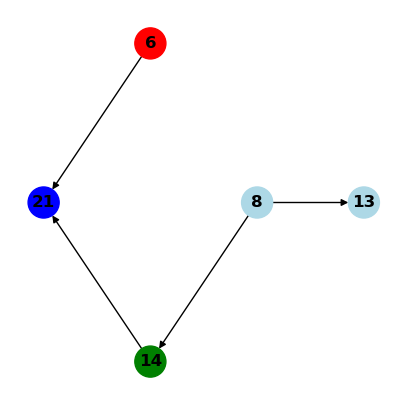

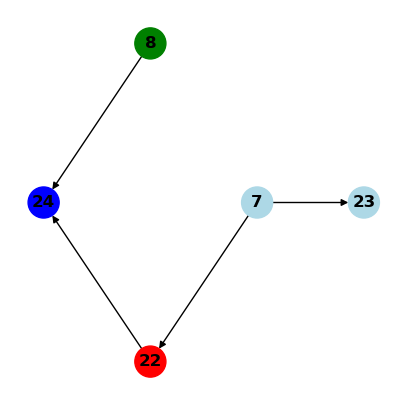

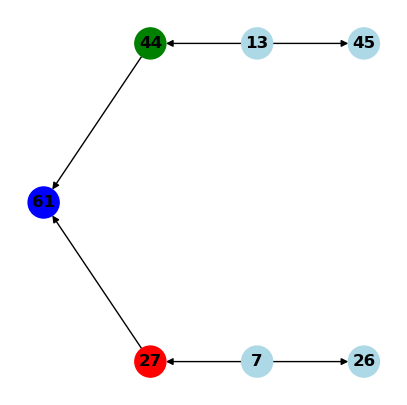

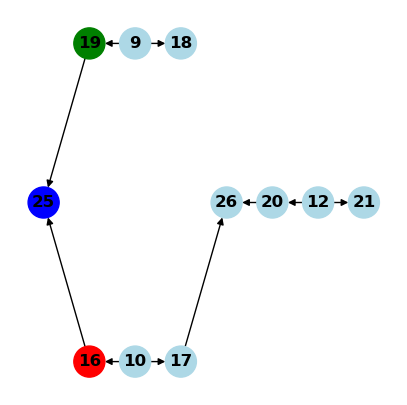

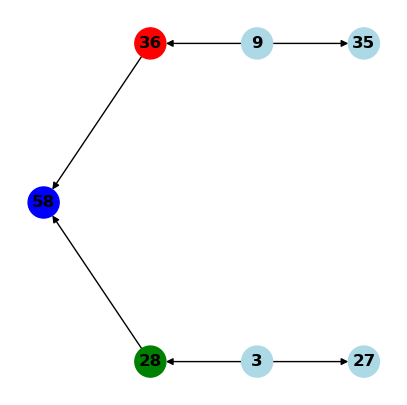

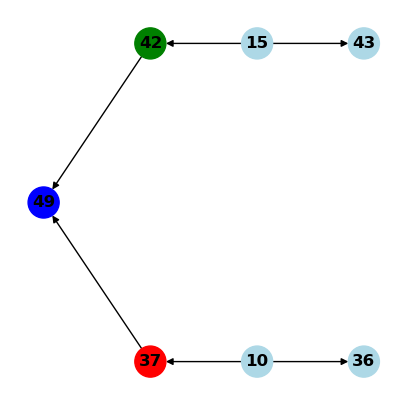

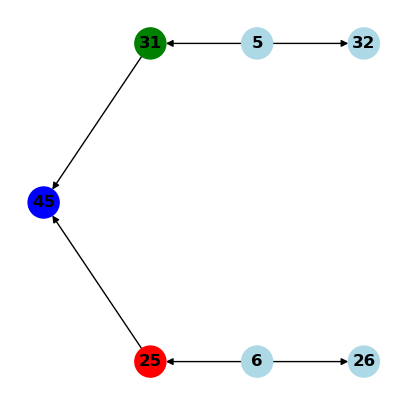

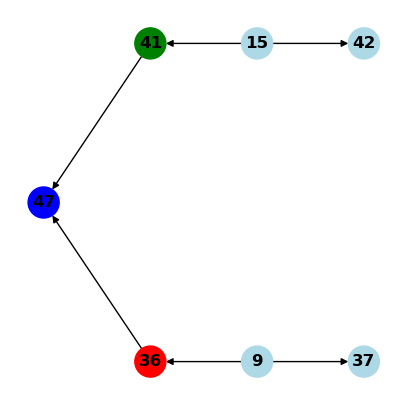

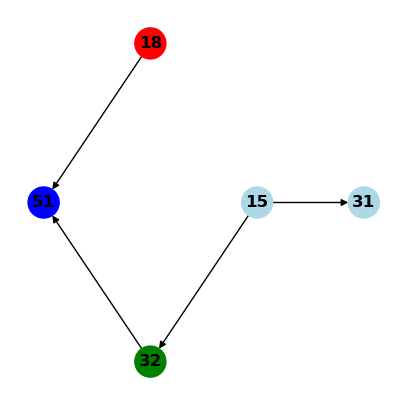

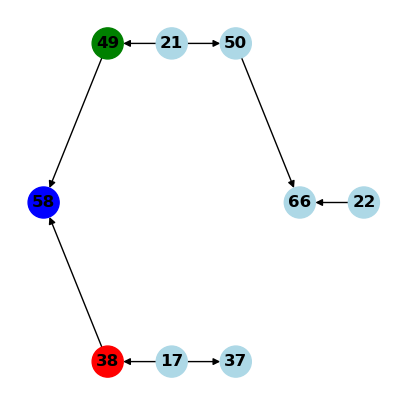

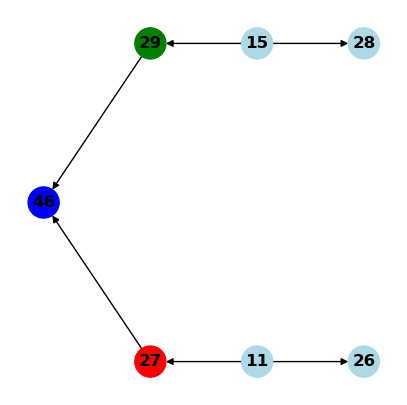

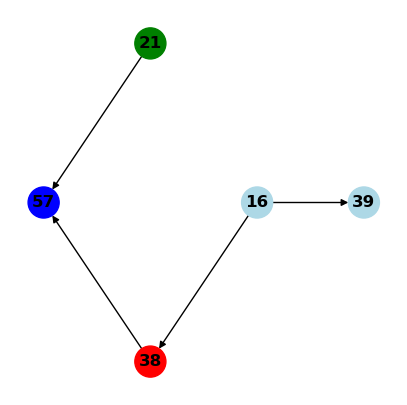

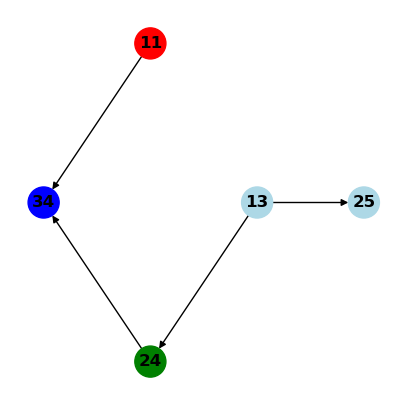

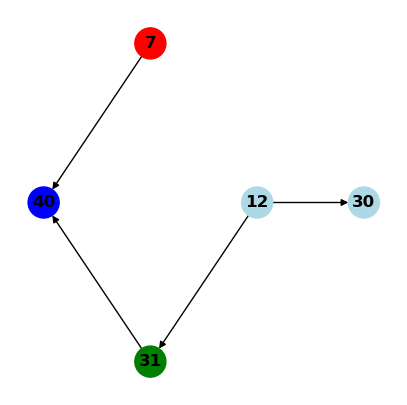

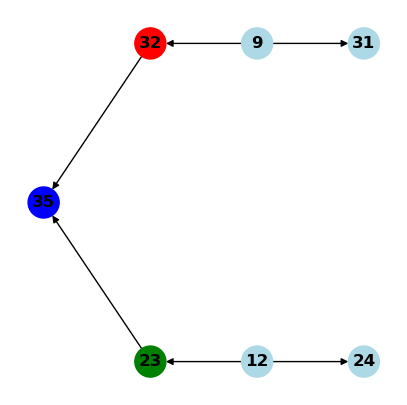

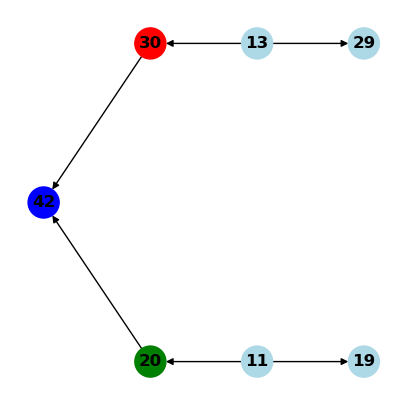

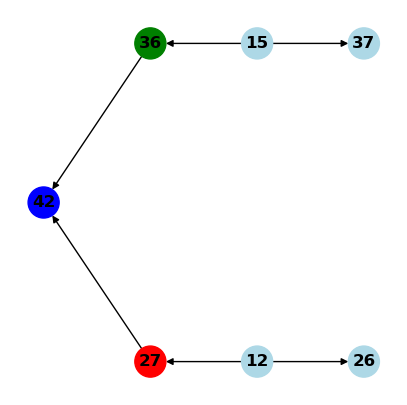

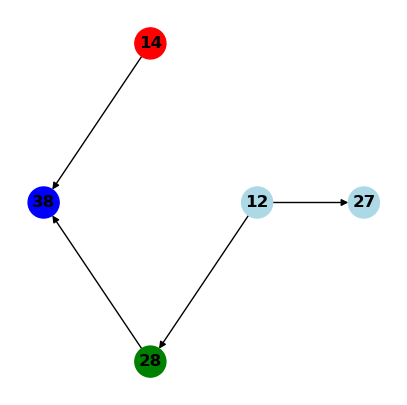

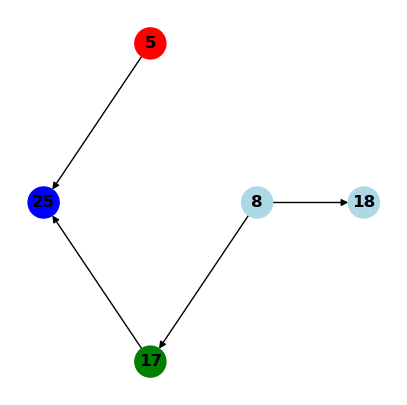

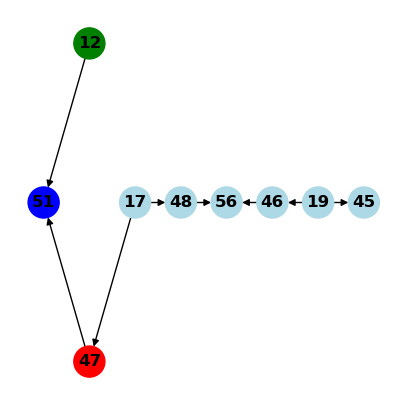

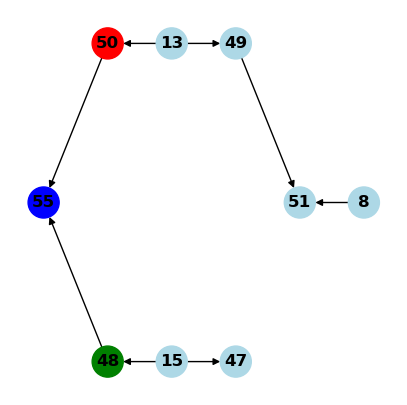

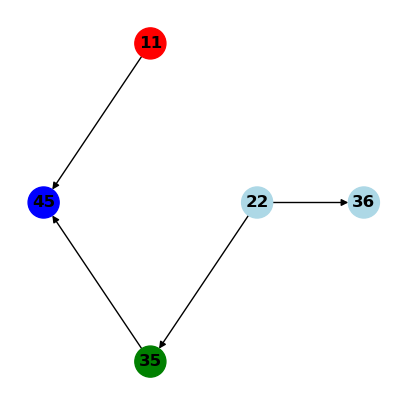

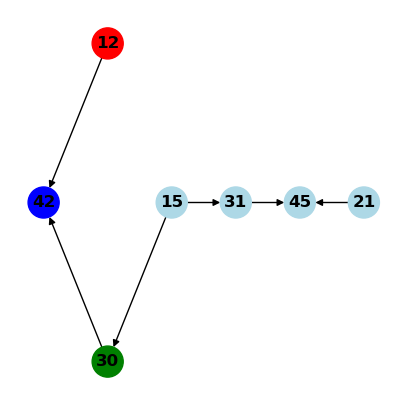

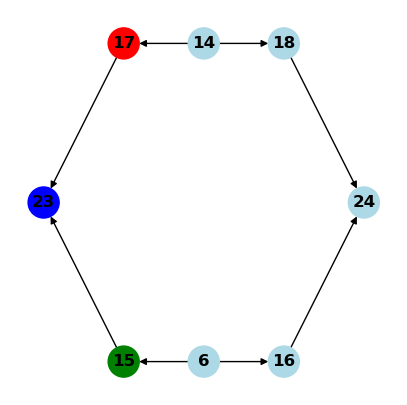

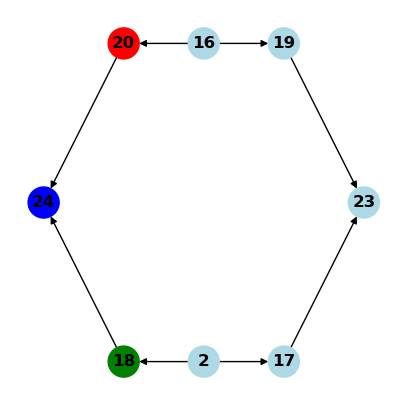

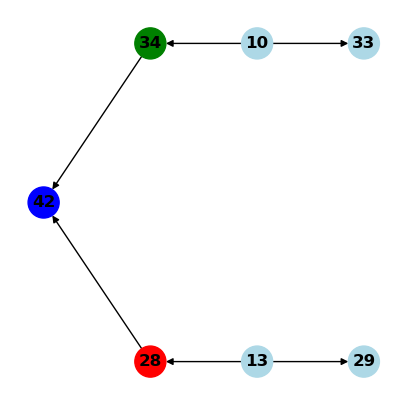

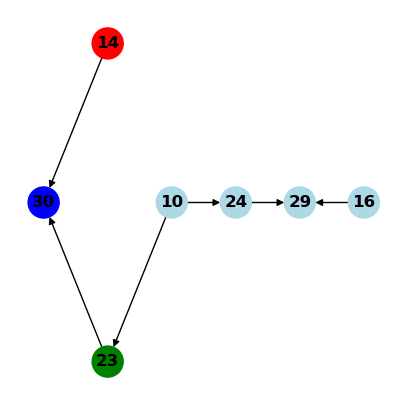

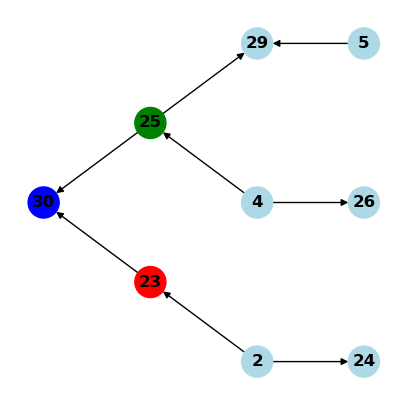

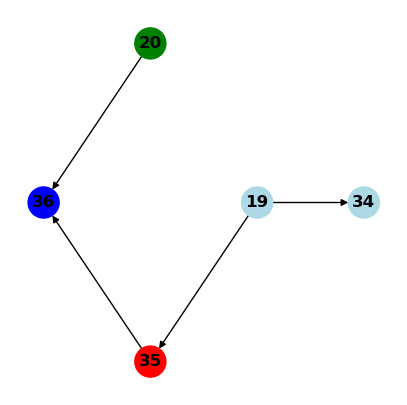

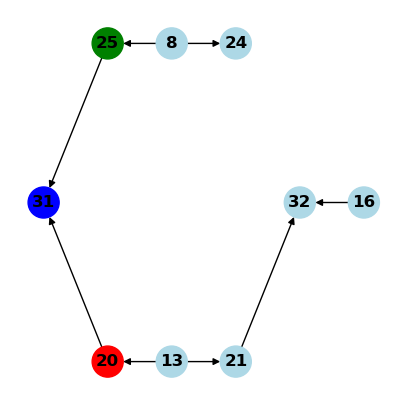

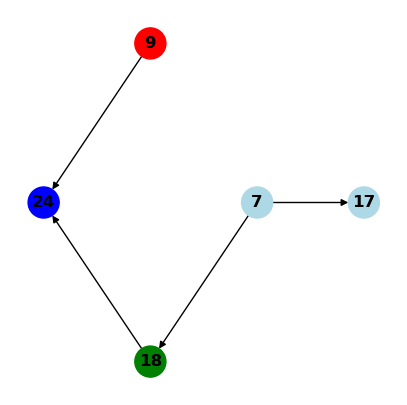

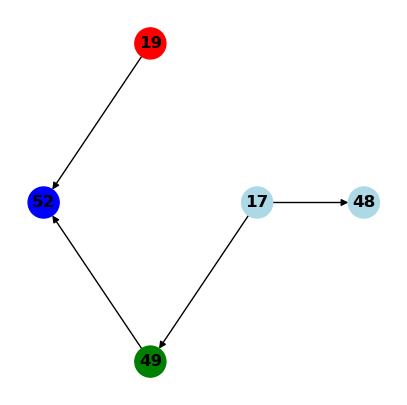

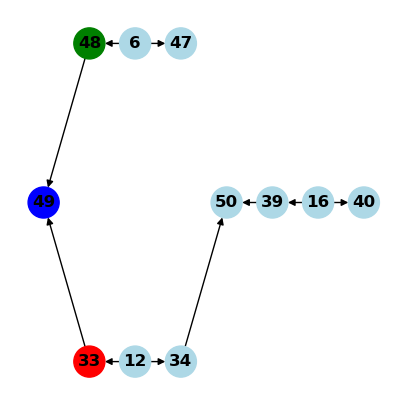

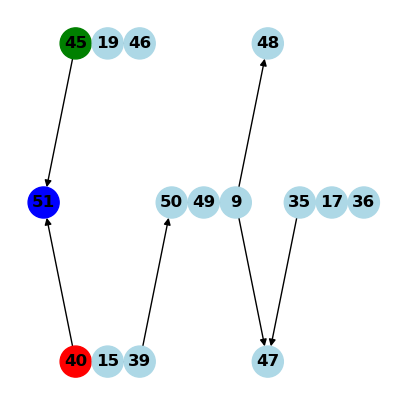

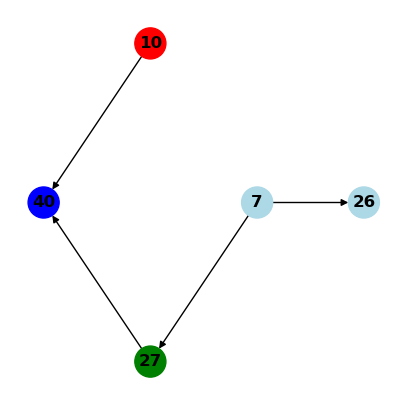

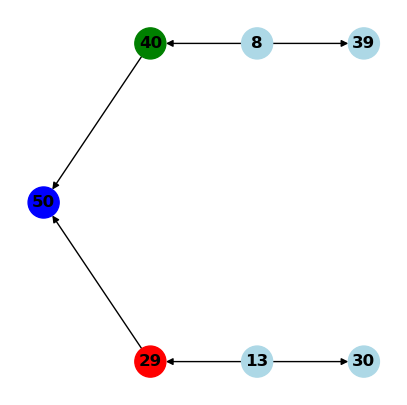

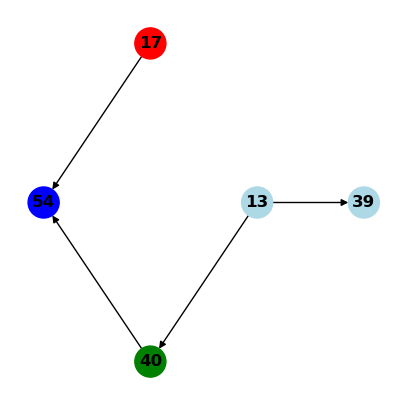

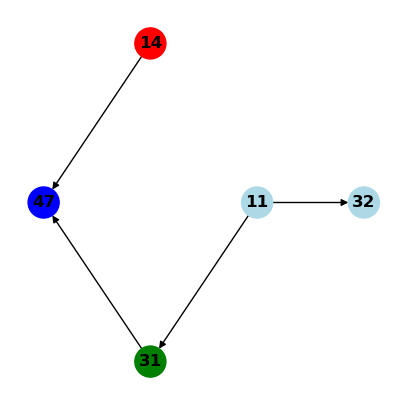

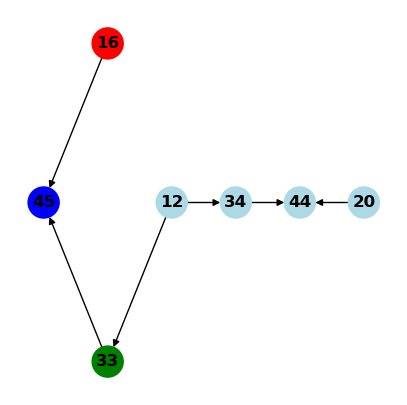

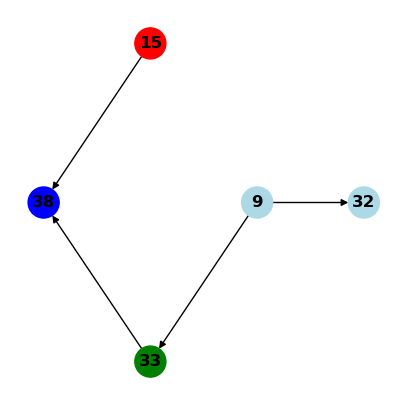

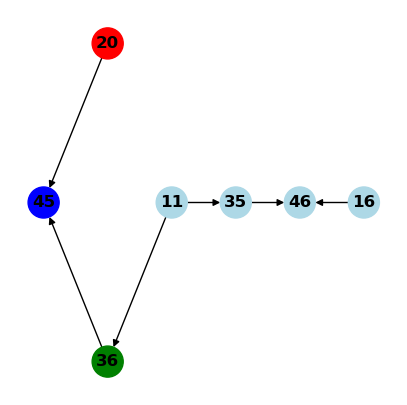

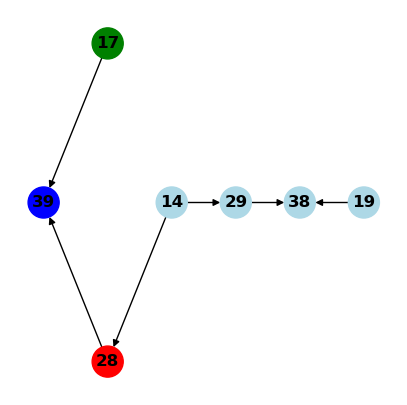

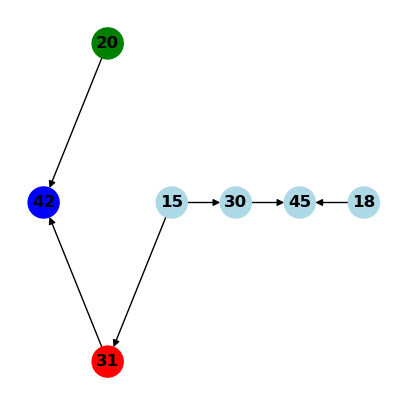

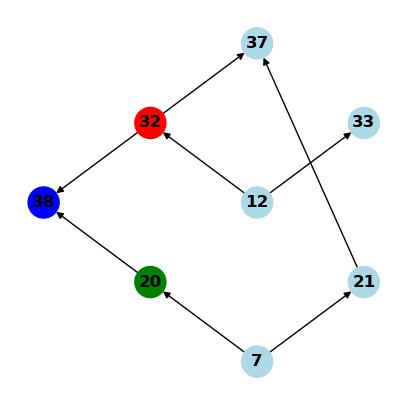

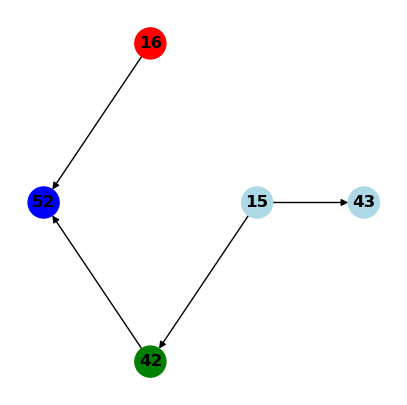

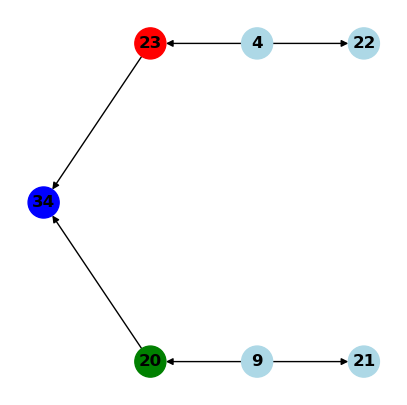

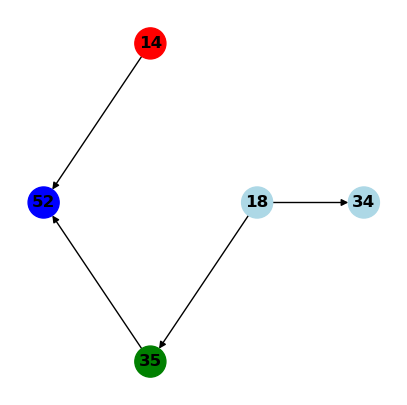

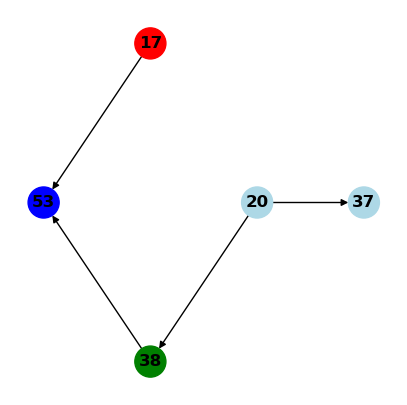

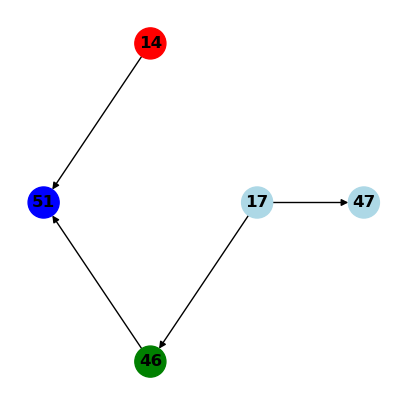

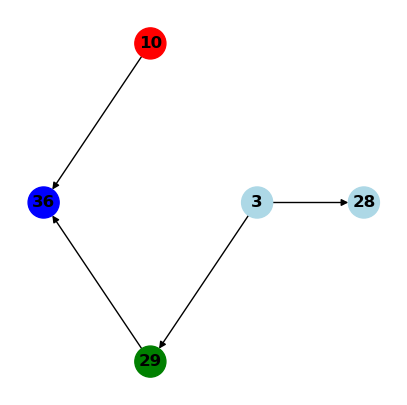

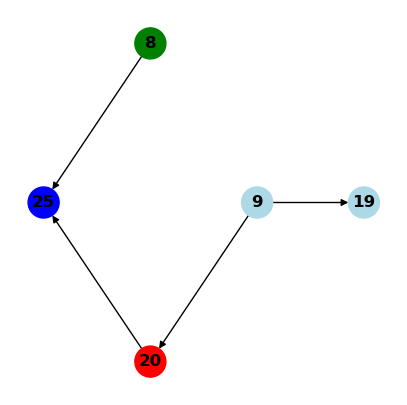

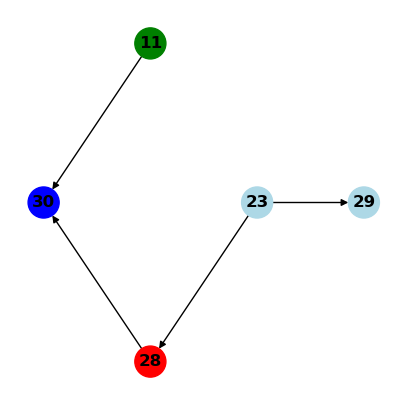

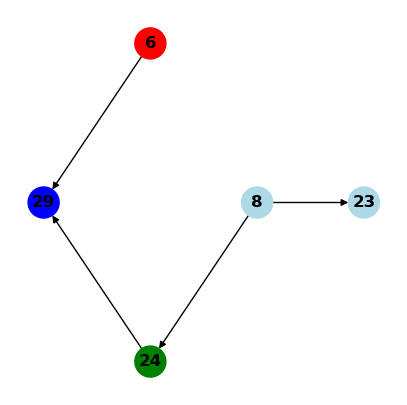

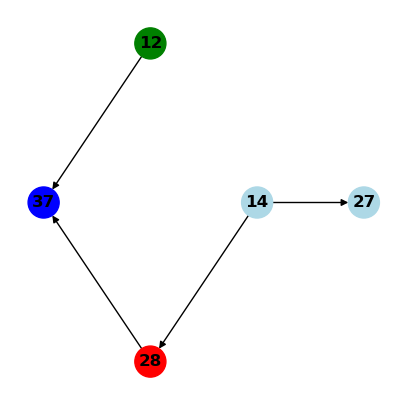

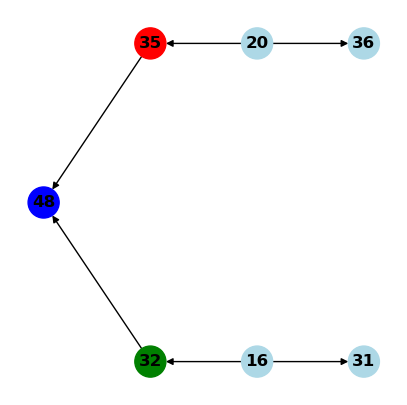

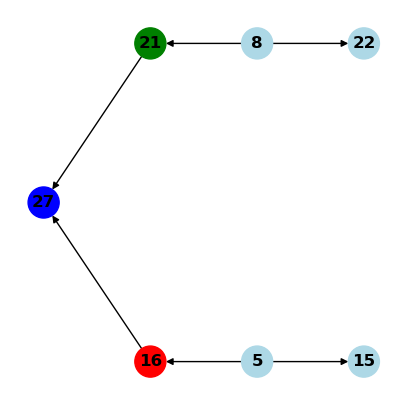

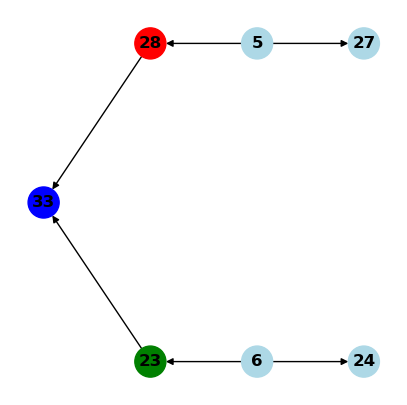

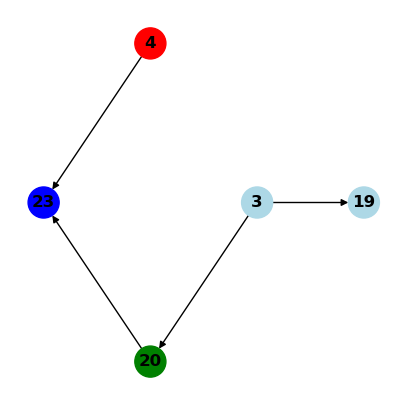

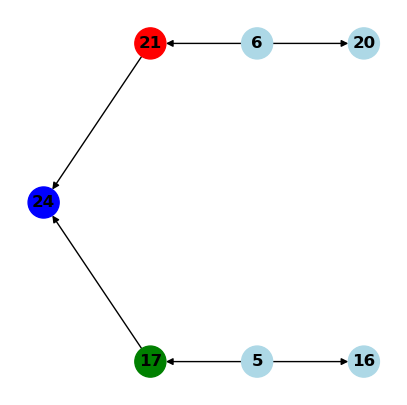

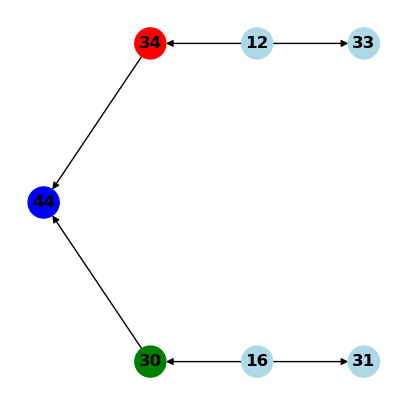

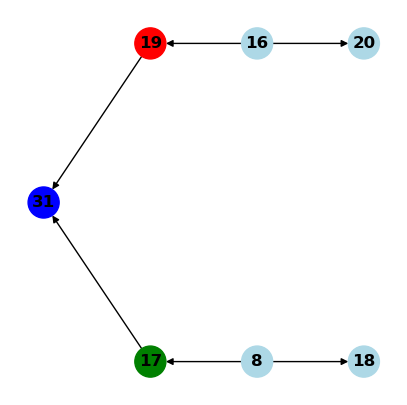

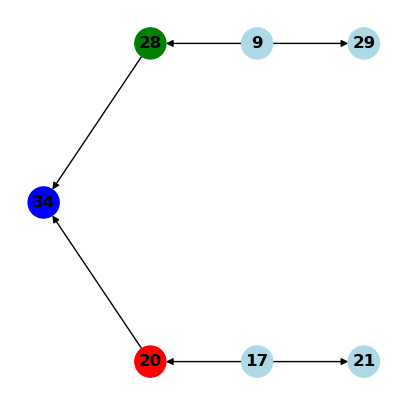

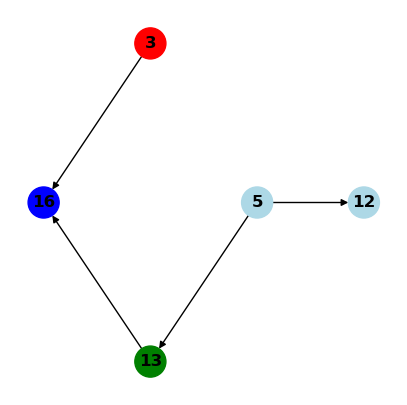

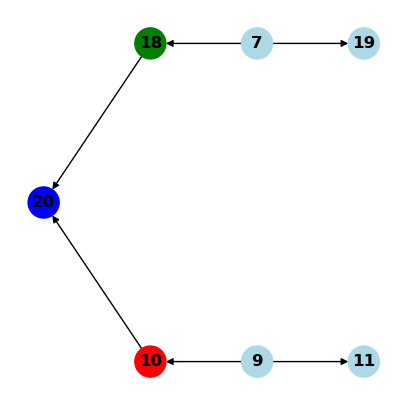

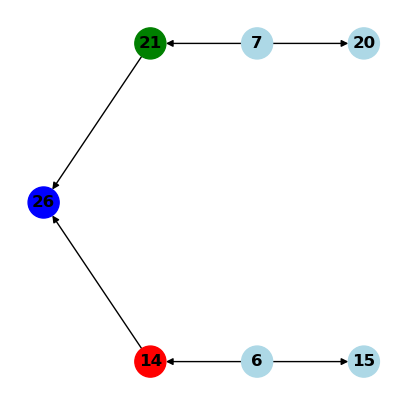

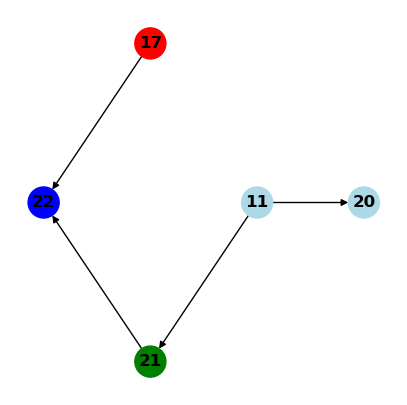

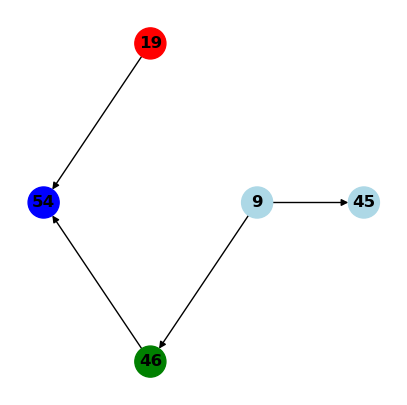

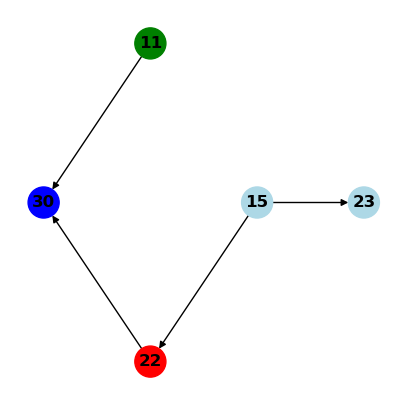

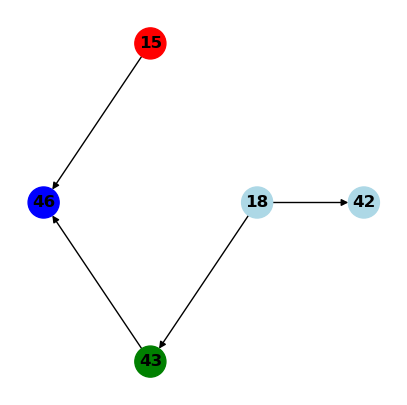

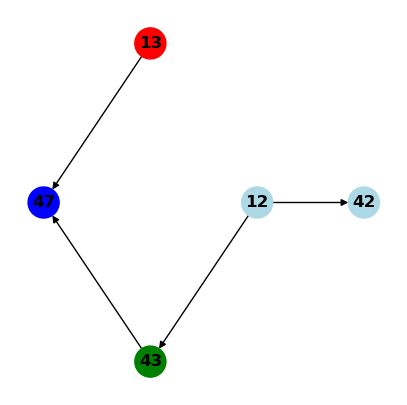

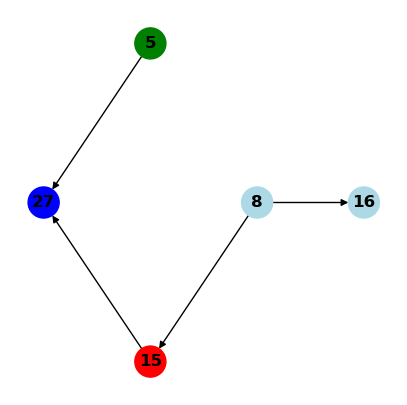

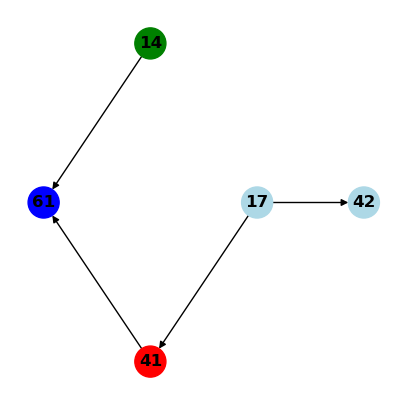

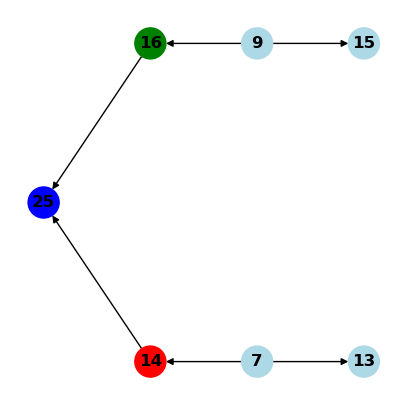

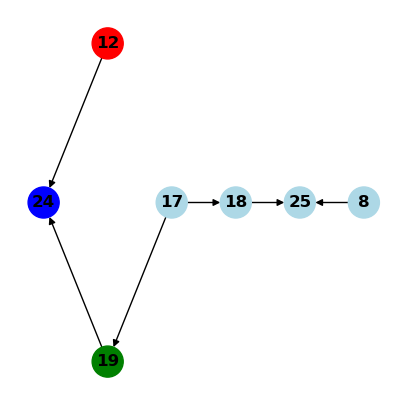

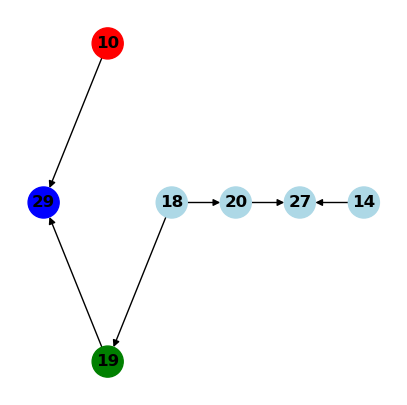

In [5]:
for i in trange(100, len(file_list)):
    try:
        file_name = file_list[i]
        key = int(file_name.split("_")[-1][:-4])
        image = imread(file_name)
        g = load_from_pkl(file_name[:-4]+".network")
        cells = create_cells_from_image(image[:,-1], g)
        key = int(file_name.split("_")[-1][:-4])
        key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
        c_mating = Mating(image=image, cells=cells, center=key, g=g)
        draw_subgraph(g, key, c_mating.p, c_mating.m)
        plt.savefig("./figs_for_check_data/"+os.path.basename(file_name)[:-4]+"_net.png")
    except Exception as error:
    # handle the exception
        print(file_name," : ", error)

In [361]:
file_name = file_list[14]

In [362]:
key = int(file_name.split("_")[-1][:-4])
image = imread(file_name)
g = load_from_pkl(file_name[:-4]+".network")
cells = create_cells_from_image(image[:,-1], g)
key = int(file_name.split("_")[-1][:-4])
key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
print(file_name)

/media/wd/T7/data/mating_all/20220802_YAV2104xYAV2015_001/selected/20220802_YAV2104xYAV2105_001_03_R3D_REF_rigid_004006.tif


In [363]:
key

21

In [364]:
c_mating = Mating(image=image, cells=cells, center=key, g=g)

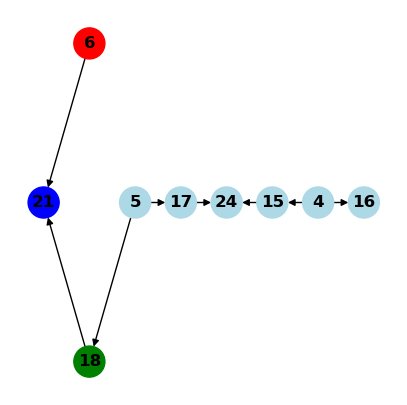

In [365]:
draw_subgraph(g, key, c_mating.p, c_mating.m)
plt.savefig("./test.png")

In [354]:
time = 110
id = 0

In [355]:
data = c_mating.center_cells_potential_pairs(time)
p, m ,f = data[["p_id", "m_id", "flag"]].astype(np.int_).loc[id]
show_image = multigray2rgb(image[time, 0:3], axis=0,  colors_channel={"r": 2, "g": 1, "a":0})

In [356]:
data[["p_id","m_id","flag"]]

,p_id,m_id,flag
0,13,17,True
1,13,17,True
2,21,17,False


pairs: 2
angle p:  70.46785153494794 48 
angle m:  55.485359063046054 20


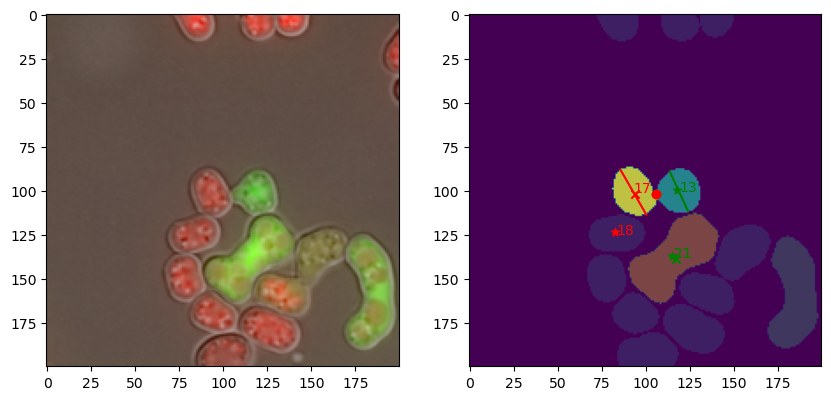

In [357]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
axs[0].imshow(show_image)
axs[1].imshow((image[time, -1]%1000==p)*1 + (image[time, -1]%1000==m)*2)
axs[1].imshow(image[time, -1], alpha=0.3)
show_quantification(c_mating, data, id=id, time=time, ax=axs[1])